In [1]:
options(pkgType = "binary", repos = "https://cran-archive.r-project.org/")

In [2]:
#Libraries:
install.packages("ISLR2")
install.packages("boot")
install.packages("tidyverse")
install.packages("readr")
install.packages("grf")
install.packages("sandwich")
install.packages("lmtest")
install.packages("Hmisc")
library(ISLR2)
library(boot)
library(tidyverse)
library(readr)
library(grf)
library(sandwich)
library(lmtest)
library(Hmisc)

Installing package into 'C:/Users/user/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'ISLR2' is not available (as a binary package for R version 3.6.1)"Installing package into 'C:/Users/user/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'boot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpYlXlwu\downloaded_packages


Installing package into 'C:/Users/user/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpYlXlwu\downloaded_packages


Installing package into 'C:/Users/user/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'readr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpYlXlwu\downloaded_packages


Installing package into 'C:/Users/user/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'grf' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpYlXlwu\downloaded_packages


Installing package into 'C:/Users/user/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'sandwich' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpYlXlwu\downloaded_packages


Installing package into 'C:/Users/user/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'lmtest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpYlXlwu\downloaded_packages


Installing package into 'C:/Users/user/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'Hmisc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpYlXlwu\downloaded_packages


Warning message:
"package 'boot' was built under R version 3.6.3"Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.1 --
v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message

# Bootstraping

In [3]:
bd=read.table("../../data/penn_jae.dat",header=TRUE)
bd=bd %>%
    filter(tg==0|tg==4)
head(bd)

abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
10824,0,18,18,0,0,0,0,2,0,...,1,0,0,0,0,0,0,0,1,0
10824,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10607,4,9,9,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
10831,0,27,27,0,0,0,0,1,0,...,1,0,0,0,1,1,0,1,0,0
10845,0,27,27,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0


In [4]:
alpha.fn <- function(data, index) {
  X <- data$X[index]
  Y <- data$Y[index]
  (var(Y) - cov(X, Y)) / (var(X) + var(Y) - 2 * cov(X, Y))
}

### Log(inuidur1) with T4

In [5]:
bd1=bd %>%
    mutate(log_inuidur1=log(inuidur1))%>%
    select(Y=log_inuidur1,X=tg)
head(bd1)    
alpha.fn(bd1, 1:1000)

Y,X
2.890372,0
0.000000,0
3.295837,0
2.197225,4
3.295837,0
3.295837,0


[1] 0.2939055


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = bd1, statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
     original        bias    std. error
t1* 0.2967502 -0.0002077866 0.004152034

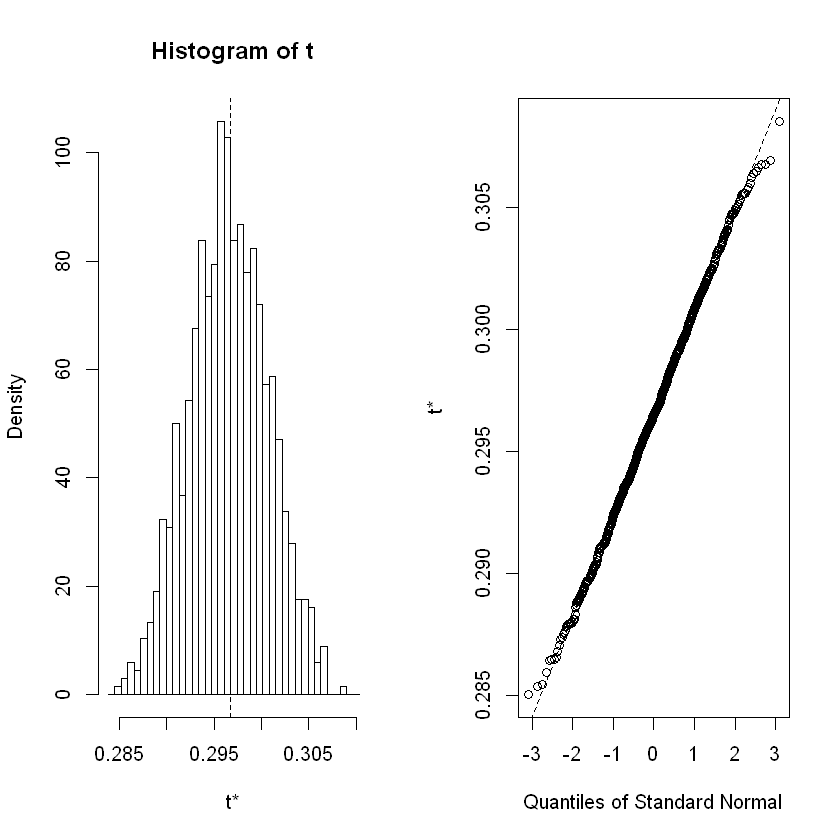

In [6]:
#1000 times
x1=boot(bd1, alpha.fn, R = 1000)
x1
plot(x1)

### Log(inuidur1) with female

In [7]:
bd2=bd %>%
    mutate(log_inuidur1=log(inuidur1))%>%
    select(Y=log_inuidur1,X=female)
head(bd2)    
alpha.fn(bd2, 1:1000)

Y,X
2.890372,0
0.000000,0
3.295837,0
2.197225,0
3.295837,0
3.295837,1


[1] 0.8683386


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = bd2, statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
     original       bias    std. error
t1* 0.8712819 2.293182e-05 0.004248214

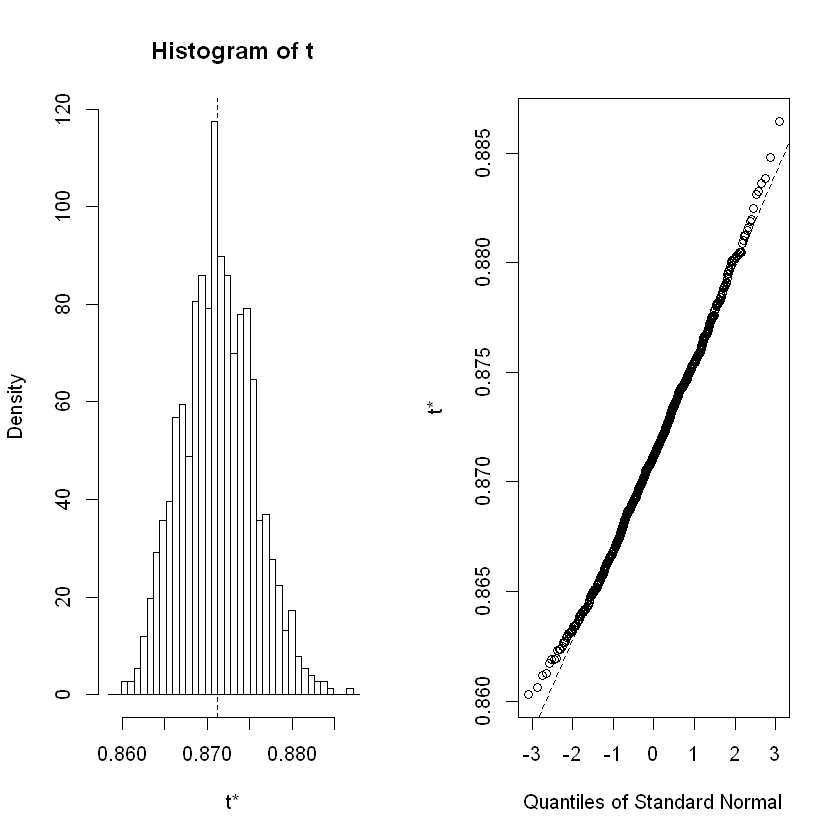

In [8]:
#1000 times
x2=boot(bd2, alpha.fn, R = 1000)
x2
plot(x2)

### Log(inuidur1) with black

In [9]:
bd3=bd %>%
    mutate(log_inuidur1=log(inuidur1))%>%
    select(Y=log_inuidur1,X=black)
head(bd3)    
alpha.fn(bd3, 1:1000)

Y,X
2.890372,0
0.000000,0
3.295837,0
2.197225,0
3.295837,0
3.295837,0


[1] 0.9220945


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = bd3, statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
     original        bias    std. error
t1* 0.9169107 -2.415779e-05 0.004102272

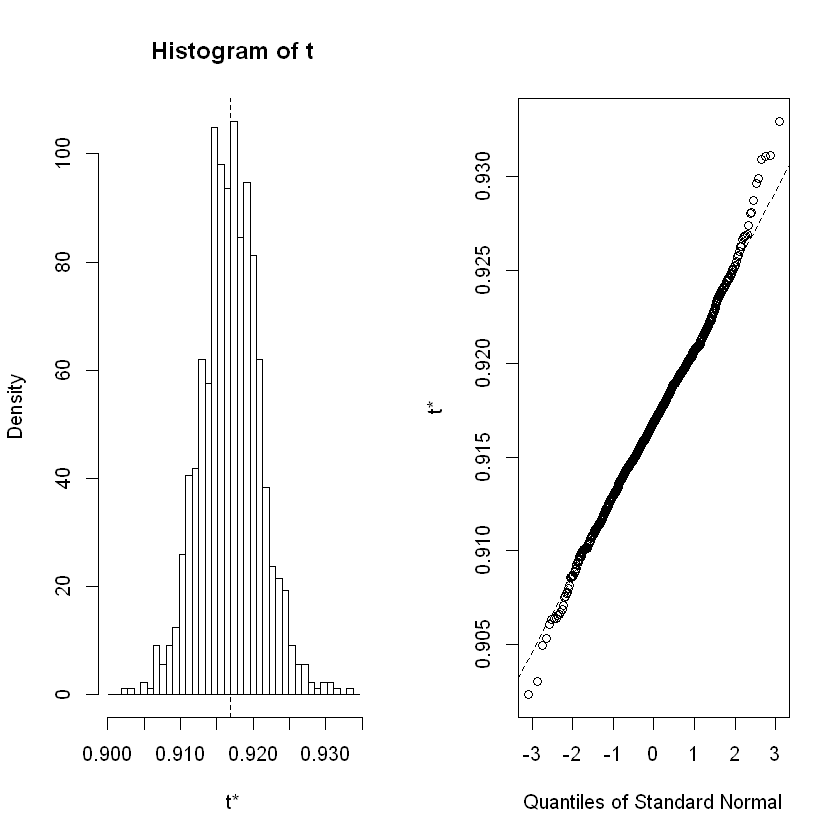

In [10]:
#1000 times
x3=boot(bd3, alpha.fn, R = 1000)
x3
plot(x3)

In [11]:
bd4=bd %>%
    mutate(log_inuidur1=log(inuidur1))%>%
    select(log_inuidur1,tg,female,black,othrace,dep,q2,q3,q4,q5,q6,agelt35,agegt54,durable,lusd,husd)
head(bd4)

boot.fn <- function(data, index){
 coef(lm(log_inuidur1 ~ tg+female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd, data = data, subset = index))   
}

log_inuidur1,tg,female,black,othrace,dep,q2,q3,q4,q5,q6,agelt35,agegt54,durable,lusd,husd
2.890372,0,0,0,0,2,0,0,0,1,0,0,0,0,0,1
0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3.295837,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2.197225,4,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3.295837,0,0,0,0,1,0,0,0,1,0,0,1,1,1,0
3.295837,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0


In [12]:
reg_lineal = boot(bd4, boot.fn, 1000)
reg_lineal


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = bd4, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
         original        bias    std. error
t1*   2.178462326 -1.112122e-03 0.158803273
t2*  -0.017923121 -2.038121e-04 0.008988733
t3*   0.126368328 -6.170311e-04 0.034755266
t4*  -0.293767980 -7.293909e-04 0.059340058
t5*  -0.472445058 -1.103096e-02 0.240147521
t6*   0.029866899  7.927593e-04 0.055136888
t7*   0.096186517  1.001107e-03 0.045795007
t8*   0.073678072 -3.795269e-05 0.154516712
t9*  -0.038506537  2.262839e-03 0.155217974
t10* -0.054949195  1.831856e-03 0.156478815
t11* -0.144177912 -2.739771e-04 0.156130525
t12*  0.003361318  1.272811e-03 0.163983627
t13* -0.162772168  5.157882e-04 0.038451741
t14*  0.229666708 -1.602986e-03 0.058001247
t15*  0.126557359 -1.866841e-03 0.046932414
t16* -0.175352572  1.117230e-03 0.039878016
t17* -0.105224727  4.398885e-04 0.045594796

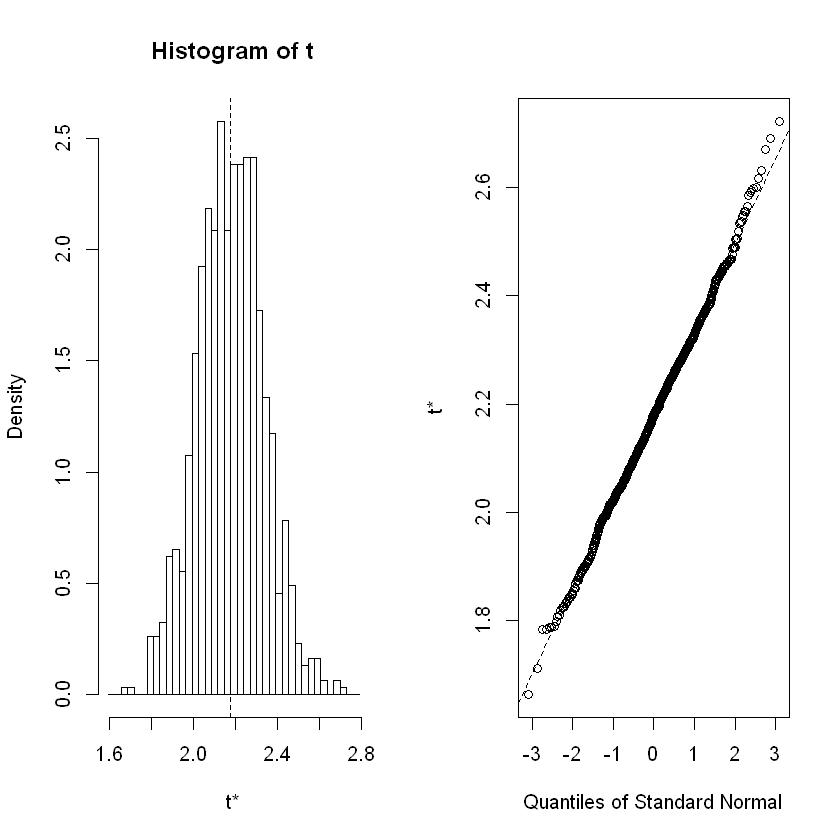

In [13]:
plot(reg_lineal, index=1) #intercept

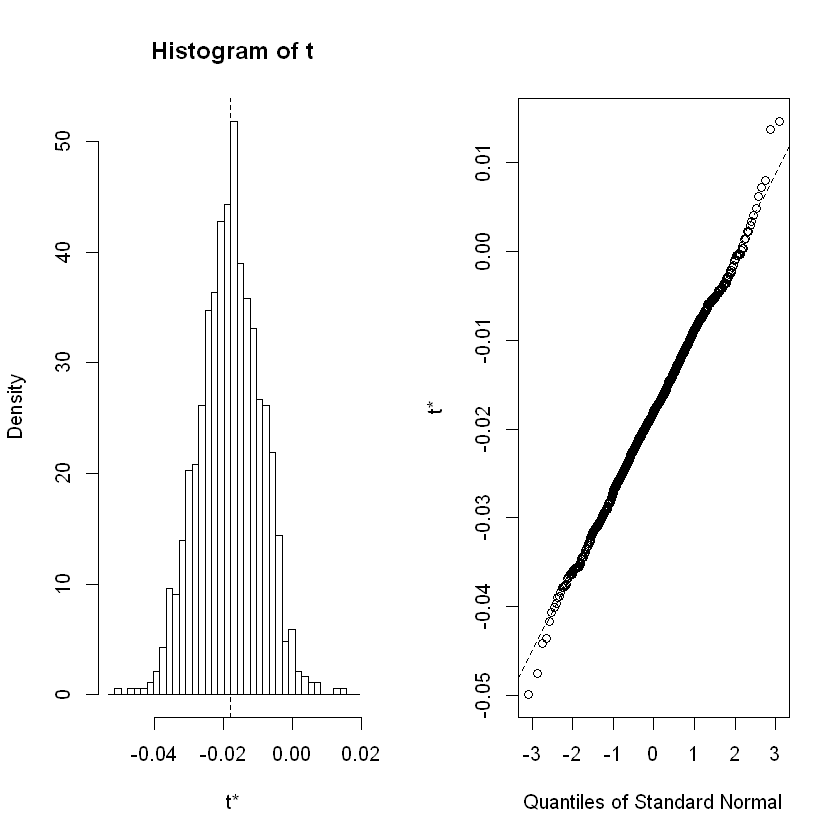

In [14]:
plot(reg_lineal, index=2) #tg coef

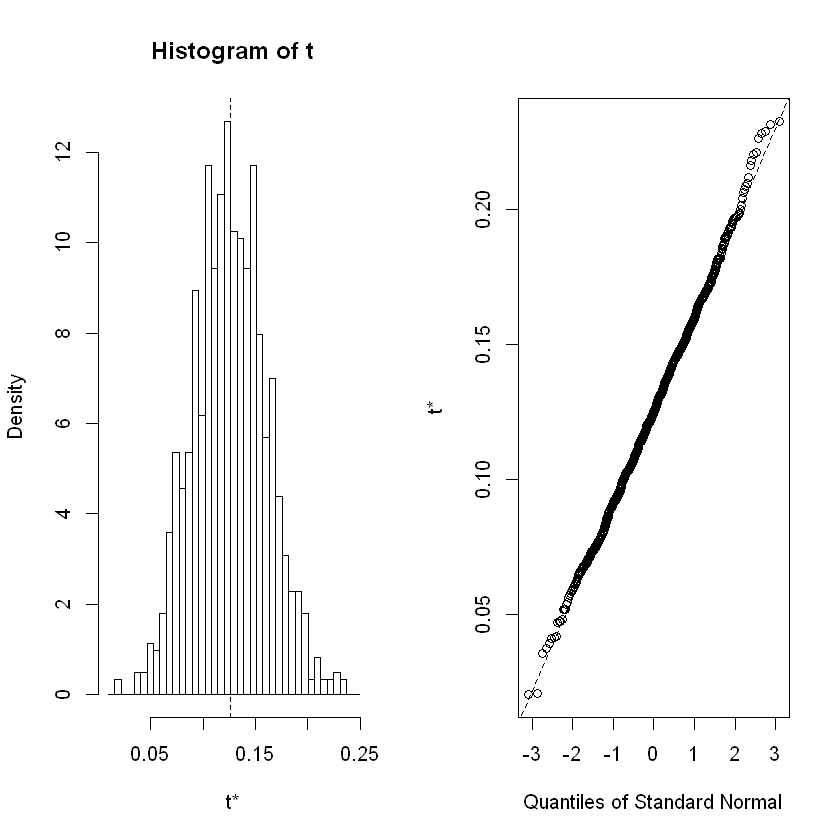

In [15]:
plot(reg_lineal, index=3) #female coef

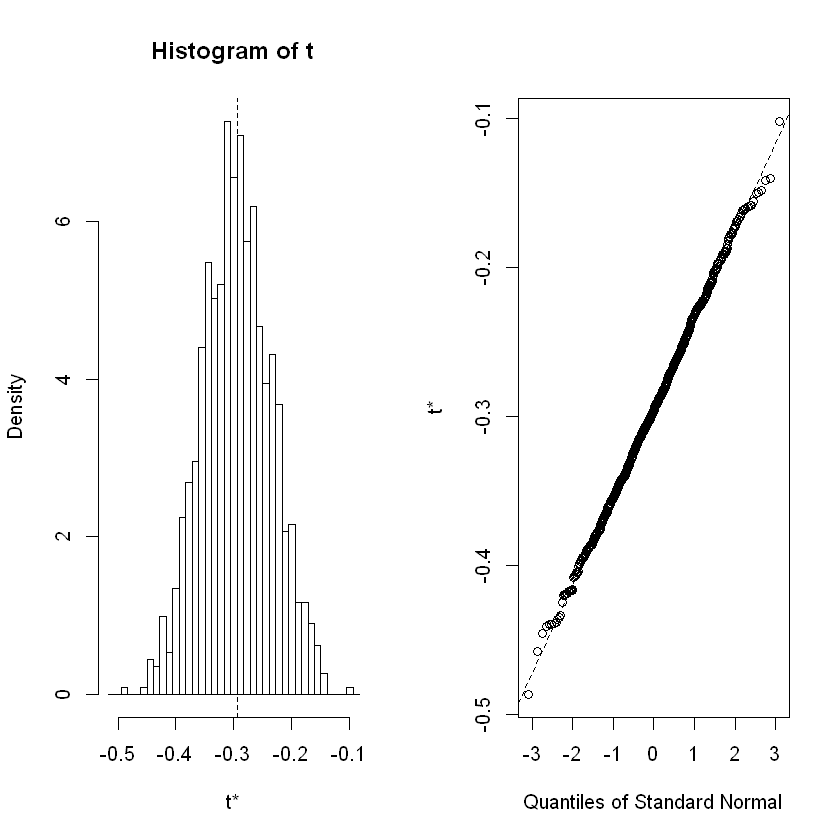

In [16]:
plot(reg_lineal, index=4) #black coef

In [17]:
sds=data.frame(variables=c("tg","female","black"),std_error=c(0.005096029,0.021363115,0.037749723))
print(sds)

  variables   std_error
1        tg 0.005096029
2    female 0.021363115
3     black 0.037749723


# Causal forest

In [18]:
url="https://raw.githubusercontent.com/grf-labs/grf/f79679d72124db505b92aca0be0ab2a694b70749/experiments/acic18/synthetic_data.csv"
data.all=read_csv(url)
head(data.all)


-- Column specification --------------------------------------------------------
cols(
  schoolid = col_double(),
  Z = col_double(),
  Y = col_double(),
  S3 = col_double(),
  C1 = col_double(),
  C2 = col_double(),
  C3 = col_double(),
  XC = col_double(),
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double()
)



schoolid,Z,Y,S3,C1,C2,C3,XC,X1,X2,X3,X4,X5
76,1,0.08160167,6,4,2,1,4,0.3345435,0.6485856,-1.310927,0.2240765,-0.4267567
76,1,-0.38586896,4,12,2,1,4,0.3345435,0.6485856,-1.310927,0.2240765,-0.4267567
76,1,0.39818373,6,4,2,0,4,0.3345435,0.6485856,-1.310927,0.2240765,-0.4267567
76,1,-0.17503685,6,4,2,0,4,0.3345435,0.6485856,-1.310927,0.2240765,-0.4267567
76,1,0.88458337,6,4,1,0,4,0.3345435,0.6485856,-1.310927,0.2240765,-0.4267567
76,1,-0.09056477,6,4,2,0,4,0.3345435,0.6485856,-1.310927,0.2240765,-0.4267567



Call:
glm(formula = Z ~ ., family = binomial, data = data.all[, -3])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2079  -0.9088  -0.8297   1.4176   1.9556  

Coefficients: (6 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.9524636  0.2845173  -3.348 0.000815 ***
schoolid2    0.0697302  0.2766287   0.252 0.800986    
schoolid3    0.0382080  0.2911323   0.131 0.895586    
schoolid4    0.1761334  0.2784711   0.633 0.527059    
schoolid5   -0.0033389  0.2950180  -0.011 0.990970    
schoolid6    0.0583548  0.3067481   0.190 0.849124    
schoolid7   -0.1313759  0.3188190  -0.412 0.680288    
schoolid8    0.1233661  0.3023736   0.408 0.683279    
schoolid9   -0.1955428  0.3073344  -0.636 0.524611    
schoolid10  -0.1892794  0.2968750  -0.638 0.523752    
schoolid11  -0.2224060  0.5461005  -0.407 0.683816    
schoolid12  -0.3312420  0.5414374  -0.612 0.540682    
schoolid13  -0.0408540  0.3989507  -0.102 0.9

[1] "95% CI for the ATE: 0.247 +/- 0.041"


Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value Pr(>t)    
mean.forest.prediction         0.995953   0.083312 11.9545 <2e-16 ***
differential.forest.prediction 0.263044   0.594239  0.4427  0.329    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


[1] "95% CI for difference in ATE: 0.046 +/- 0.079"


	Welch Two Sample t-test

data:  school.score[high.X1] and school.score[!high.X1]
t = -3.0534, df = 71.974, p-value = 0.00317
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.19495979 -0.04094523
sample estimates:
mean of x mean of y 
0.1884514 0.3064039 



	Welch Two Sample t-test

data:  school.score[high.X2] and school.score[!high.X2]
t = 1.0256, df = 72.527, p-value = 0.3085
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.03938507  0.12287362
sample estimates:
mean of x mean of y 
0.2682998 0.2265555 


                 Df Sum Sq Mean Sq F value Pr(>F)
school.X2.levels  2 0.0874 0.04369   1.402  0.253
Residuals        73 2.2751 0.03117               


	One Sample t-test

data:  school.score.XS3.high - school.score.XS3.low
t = 2.2281, df = 75, p-value = 0.02887
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.009016796 0.161264348
sample estimates:
 mean of x 
0.08514057 


png 
  2

[1] "0.247 +/- 0.04"


png 
  2

[1] "95% CI for the ATE: 0.253 +/- 0.022"


Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value    Pr(>t)    
mean.forest.prediction         1.014977   0.045209 22.4508 < 2.2e-16 ***
differential.forest.prediction 0.537522   0.122194  4.3989 5.494e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


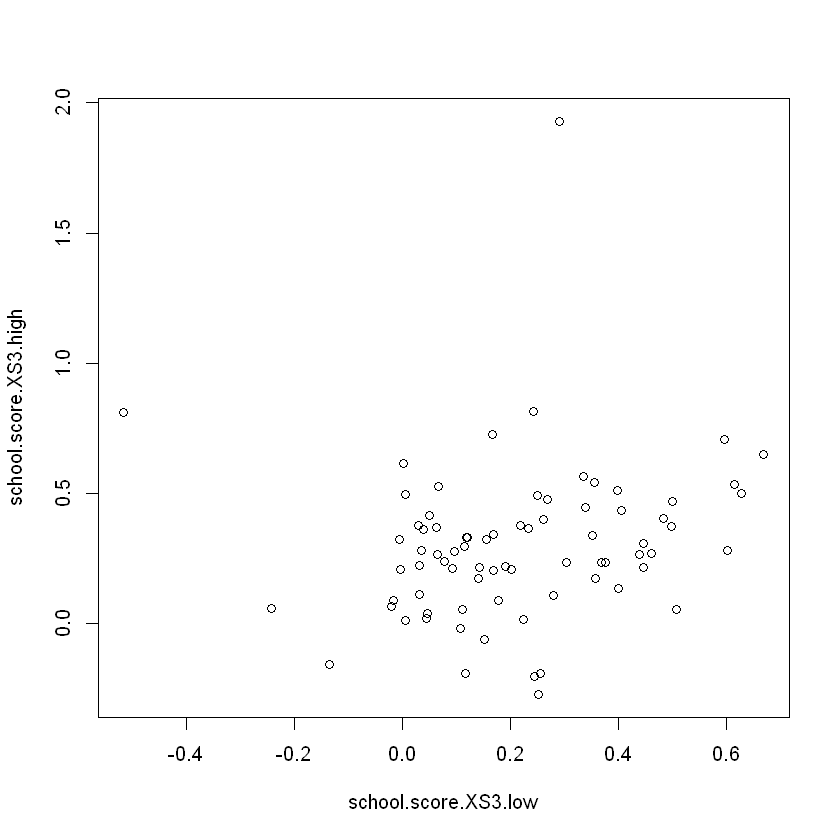

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5



Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value  Pr(>t)    
mean.forest.prediction         1.007526   0.065363 15.4144 < 2e-16 ***
differential.forest.prediction 0.467501   0.218783  2.1368 0.01632 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


[1] -8.890850e-05  9.187237e-05

                     Df Sum Sq Mean Sq F value   Pr(>F)    
factor(school.id)    75    208   2.774   2.031 3.89e-07 ***
Residuals         10315  14085   1.365                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

[1] "95% CI for the ATE: 0.254 +/- 0.04"

png 
  2


Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value Pr(>t)    
mean.forest.prediction         1.005943   0.083919 11.9871 <2e-16 ***
differential.forest.prediction 0.599088   0.701626  0.8539  0.198    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.2441706  0.0769503  3.1731 0.002291 **
X1          -0.0502721  0.0289061 -1.7392 0.086670 . 
X2           0.0133768  0.0337075  0.3968 0.692759   
X3           0.0088478  0.0265114  0.3337 0.739637   
X4           0.0239787  0.0254811  0.9410 0.350116   
X5          -0.0347834  0.0266954 -1.3030 0.197111   
XC.1        -0.0030158  0.0930629 -0.0324 0.974246   
XC.2         0.0848963  0.1053632  0.8057 0.423281   
XC.3        -0.1409711  0.0874263 -1.6125 0.111635   
XC.4         0.0408664  0.0816978  0.5002 0.618588   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

[1] "95% CI for the ATE: -0.037 +/- 0.146"

[1] "95% CI for the ATE: 0.058 +/- 0.139"

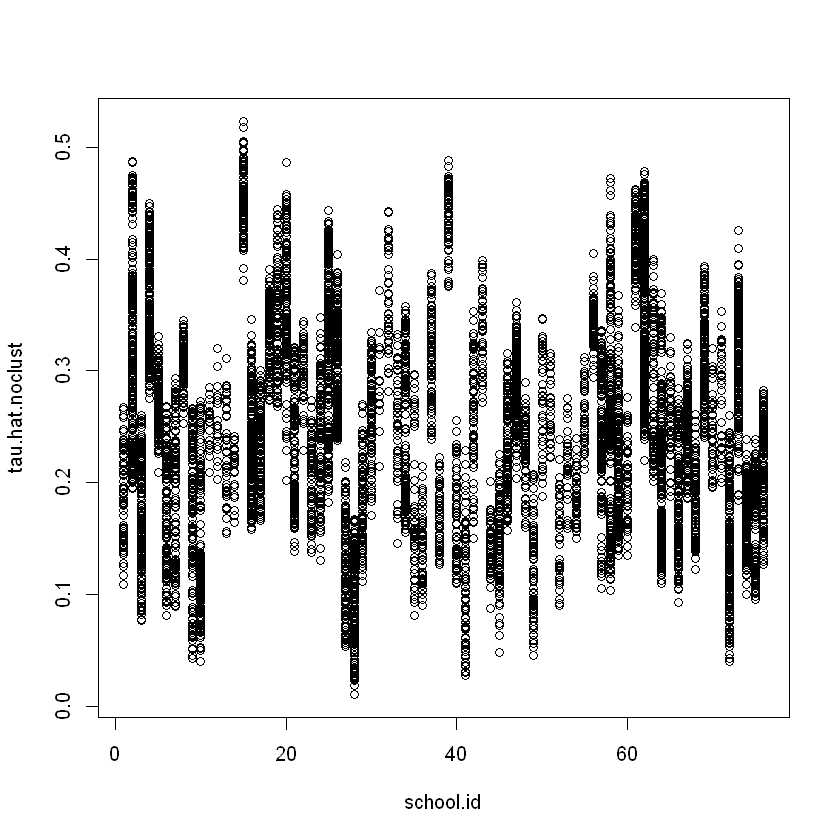

[1] 0.2105263

[1] 0.5

png 
  2

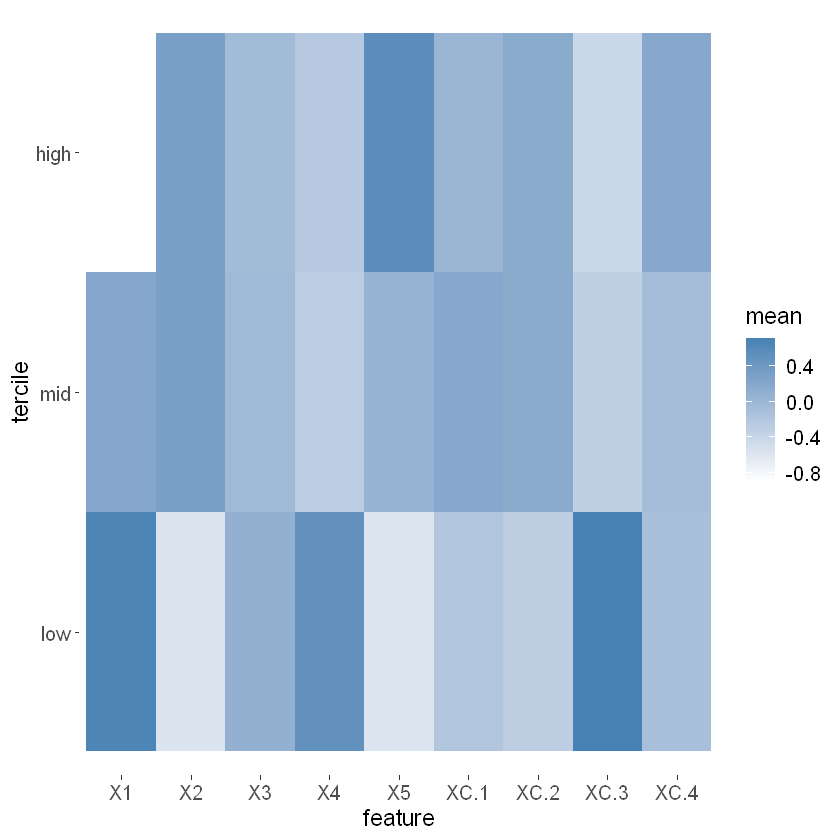

In [19]:
data.all$schoolid = factor(data.all$schoolid)

DF = data.all[,-1]
school.id = as.numeric(data.all$schoolid)

school.mat = model.matrix(~ schoolid + 0, data = data.all)
school.size = colSums(school.mat)

# It appears that school ID does not affect pscore. So ignore it
# in modeling, and just treat it as source of per-cluster error.
w.lm = glm(Z ~ ., data = data.all[,-3], family = binomial)
summary(w.lm)

W = DF$Z
Y = DF$Y
X.raw = DF[,-(1:2)]

C1.exp = model.matrix(~ factor(X.raw$C1) + 0)
XC.exp = model.matrix(~ factor(X.raw$XC) + 0)

X = cbind(X.raw[,-which(names(X.raw) %in% c("C1", "XC"))], C1.exp, XC.exp)

#
# Grow a forest. Add extra trees for the causal forest.
#

Y.forest = regression_forest(X, Y, clusters = school.id, equalize.cluster.weights = TRUE)
Y.hat = predict(Y.forest)$predictions
W.forest = regression_forest(X, W, clusters = school.id, equalize.cluster.weights = TRUE)
W.hat = predict(W.forest)$predictions

cf.raw = causal_forest(X, Y, W,
                       Y.hat = Y.hat, W.hat = W.hat,
                       clusters = school.id,
                       equalize.cluster.weights = TRUE)
varimp = variable_importance(cf.raw)
selected.idx = which(varimp > mean(varimp))

cf = causal_forest(X[,selected.idx], Y, W,
                   Y.hat = Y.hat, W.hat = W.hat,
                   clusters = school.id,
                   equalize.cluster.weights = TRUE,
                   tune.parameters = "all")
tau.hat = predict(cf)$predictions


#
# Estimate ATE
#

ATE = average_treatment_effect(cf)
paste("95% CI for the ATE:", round(ATE[1], 3),
      "+/-", round(qnorm(0.975) * ATE[2], 3))

#
# Omnibus tests for heterogeneity
#

# Run best linear predictor analysis
test_calibration(cf)

# Compare regions with high and low estimated CATEs
high_effect = tau.hat > median(tau.hat)
ate.high = average_treatment_effect(cf, subset = high_effect)
ate.low = average_treatment_effect(cf, subset = !high_effect)
paste("95% CI for difference in ATE:",
      round(ate.high[1] - ate.low[1], 3), "+/-",
      round(qnorm(0.975) * sqrt(ate.high[2]^2 + ate.low[2]^2), 3))


#
# formal test for X1 and X2
#

dr.score = tau.hat + W / cf$W.hat *
  (Y - cf$Y.hat - (1 - cf$W.hat) * tau.hat) -
  (1 - W) / (1 - cf$W.hat) * (Y - cf$Y.hat + cf$W.hat * tau.hat)
school.score = t(school.mat) %*% dr.score / school.size

school.X1 = t(school.mat) %*% X$X1 / school.size
high.X1 = school.X1 > median(school.X1)
t.test(school.score[high.X1], school.score[!high.X1])

school.X2 = (t(school.mat) %*% X$X2) / school.size
high.X2 = school.X2 > median(school.X2)
t.test(school.score[high.X2], school.score[!high.X2])

school.X2.levels = cut(school.X2,
  breaks = c(-Inf, quantile(school.X2, c(1/3, 2/3)), Inf))
summary(aov(school.score ~ school.X2.levels))

#
# formal test for S3
#

school.score.XS3.high = t(school.mat) %*% (dr.score * (X$S3 >= 6)) /
  t(school.mat) %*% (X$S3 >= 6)
school.score.XS3.low = t(school.mat) %*% (dr.score * (X$S3 < 6)) /
  t(school.mat) %*% (X$S3 < 6)

plot(school.score.XS3.low, school.score.XS3.high)
t.test(school.score.XS3.high - school.score.XS3.low)

#
# Look at school-wise heterogeneity
#

pdf("school_hist.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
hist(school.score, xlab = "School Treatment Effect Estimate", main = "")
dev.off()

#
# Re-check ATE... sanity check only
#

ate.hat = mean(school.score)
se.hat = sqrt(var(school.score) / length(school.score - 1))
print(paste(round(ate.hat, 3), "+/-", round(1.96 * se.hat, 3)))


#
# Look at variation in propensity scores
#

DF = X
DF$W.hat = cf$W.hat

pdf("pscore.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
boxplot(W.hat ~ S3, data = DF, ylab = "Propensity Score", xlab = "Student Expectation of Success")
lines(smooth.spline(X$S3, cf$W.hat), lwd = 2, col = 4)
dev.off()

#
# Analysis ignoring clusters
#

cf.noclust = causal_forest(X[,selected.idx], Y, W,
                           Y.hat = Y.hat, W.hat = W.hat,
                           tune.parameters = "all")

ATE.noclust = average_treatment_effect(cf.noclust)
paste("95% CI for the ATE:", round(ATE.noclust[1], 3),
      "+/-", round(qnorm(0.975) * ATE.noclust[2], 3))

test_calibration(cf.noclust)

tau.hat.noclust = predict(cf.noclust)$predict
plot(school.id, tau.hat.noclust)

nfold = 5
school.levels = unique(school.id)
cluster.folds = sample.int(nfold, length(school.levels), replace = TRUE)

tau.hat.crossfold = rep(NA, length(Y))
for (foldid in 1:nfold) {
  print(foldid)
  infold = school.id %in% school.levels[cluster.folds == foldid]
  cf.fold = causal_forest(X[!infold, selected.idx], Y[!infold], W[!infold],
                          Y.hat = Y.hat[!infold], W.hat = W.hat[!infold],
                          tune.parameters = "all")
  pred.fold = predict(cf.fold, X[infold, selected.idx])$predictions
  tau.hat.crossfold[infold] = pred.fold
}

cf.noclust.cpy = cf.noclust
cf.noclust.cpy$predictions = tau.hat.crossfold
cf.noclust.cpy$clusters = school.id
test_calibration(cf.noclust.cpy)

Rloss = mean(((Y - Y.hat) - tau.hat * (W - W.hat))^2)
Rloss.noclust = mean(((Y - Y.hat) - tau.hat.noclust * (W - W.hat))^2)
Rloss.crossfold = mean(((Y - Y.hat) - tau.hat.crossfold * (W - W.hat))^2)

c(Rloss.noclust - Rloss, Rloss.crossfold - Rloss)

summary(aov(dr.score ~ factor(school.id)))

#
# Analaysis without fitting the propensity score
#

cf.noprop = causal_forest(X[,selected.idx], Y, W,
                          Y.hat = Y.hat, W.hat = mean(W),
                          tune.parameters = "all",
                          equalize.cluster.weights = TRUE,
                          clusters = school.id)
tau.hat.noprop = predict(cf.noprop)$predictions

ATE.noprop = average_treatment_effect(cf.noprop)
paste("95% CI for the ATE:", round(ATE.noprop[1], 3),
      "+/-", round(qnorm(0.975) * ATE.noprop[2], 3))

pdf("tauhat_noprop.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
plot(tau.hat, tau.hat.noprop,
     xlim = range(tau.hat, tau.hat.noprop),
     ylim = range(tau.hat, tau.hat.noprop),
     xlab = "orthogonalized causal forest estimates",
     ylab = "non-orthogonalized causal forest")
abline(0, 1, lwd = 2, lty = 2, col = 4)
par = pardef
dev.off()




#
# Train forest on school-wise DR scores
#

school.X = (t(school.mat) %*% as.matrix(X[,c(4:8, 25:28)])) / school.size
school.X = data.frame(school.X)
colnames(school.X) = c("X1", "X2", "X3", "X4", "X5",
                    "XC.1", "XC.2", "XC.3", "XC.4")

dr.score = tau.hat + W / cf$W.hat * (Y - cf$Y.hat - (1 - cf$W.hat) * tau.hat) -
  (1 - W) / (1 - cf$W.hat) * (Y - cf$Y.hat + cf$W.hat * tau.hat)
school.score = t(school.mat) %*% dr.score / school.size

school.forest = regression_forest(school.X, school.score)
school.pred = predict(school.forest)$predictions
test_calibration(school.forest)


# Alternative OLS analysis
school.DF = data.frame(school.X, school.score=school.score)
coeftest(lm(school.score ~ ., data = school.DF), vcov = vcovHC)

#
# Make some plots...
#

pdf("tauhat_hist.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
hist(tau.hat, xlab = "estimated CATE", main = "")
dev.off()

pdf("tauhat_hist_noprop.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
hist(tau.hat.noprop, xlab = "estimated CATE", main = "")
dev.off()

pdf("tauhat_hist_noclust.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
hist(tau.hat.noclust, xlab = "estimated CATE", main = "",
     breaks = seq(-0.0, 0.55, by = 0.55 / 25))
dev.off()


pdf("tauhat_vs_X1.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
boxplot(tau.hat ~ round(X$X1), xlab = "X1", ylab = "estimated CATE")
lines(smooth.spline(4 + X[,"X1"], tau.hat, df = 4), lwd = 2, col = 4)
dev.off()

pdf("tauhat_vs_X2.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
boxplot(tau.hat ~ round(X$X2), xlab = "X2", ylab = "estimated CATE")
lines(smooth.spline(4 + X[,"X2"], tau.hat, df = 4), lwd = 2, col = 4)
dev.off()

school.avg.tauhat = t(school.mat) %*% tau.hat / school.size

pdf("school_avg.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
plot(school.avg.tauhat, school.pred, cex = 1.5,
     xlim = range(school.avg.tauhat, school.pred),
     ylim = range(school.avg.tauhat, school.pred),
     xlab = "average CATE estimate in school",
     ylab = "school-wise forest predictions")
abline(0, 1, lwd = 2, lty = 2, col = 4)
par = pardef
dev.off()

#
# Experiment with no orthogonalization
#

n.synth = 1000
p.synth = 10
X.synth = matrix(rnorm(n.synth * p.synth), n.synth, p.synth)
W.synth = rbinom(n.synth, 1, 1 / (1 + exp(-X.synth[,1])))
Y.synth = 2 * rowMeans(X.synth[,1:6]) + rnorm(n.synth)

Y.forest.synth = regression_forest(X.synth, Y.synth)
Y.hat.synth = predict(Y.forest.synth)$predictions
W.forest.synth = regression_forest(X.synth, W.synth)
W.hat.synth = predict(W.forest.synth)$predictions

cf.synth = causal_forest(X.synth, Y.synth, W.synth,
                         Y.hat = Y.hat.synth, W.hat = W.hat.synth)
ATE.synth = average_treatment_effect(cf.synth)
paste("95% CI for the ATE:", round(ATE.synth[1], 3),
      "+/-", round(qnorm(0.975) * ATE.synth[2], 3))

cf.synth.noprop = causal_forest(X.synth, Y.synth, W.synth,
                                Y.hat = Y.hat.synth, W.hat = mean(W.synth))
ATE.synth.noprop = average_treatment_effect(cf.synth.noprop)
paste("95% CI for the ATE:", round(ATE.synth.noprop[1], 3),
      "+/-", round(qnorm(0.975) * ATE.synth.noprop[2], 3))

#
# Visualize school-level covariates by treatment heterogeneity
#

school.X.std = scale(school.X)
school.tercile = cut(school.pred,
                     breaks = c(-Inf, quantile(school.pred, c(1/3, 2/3)), Inf))
school.tercile.mat = model.matrix(~ school.tercile + 0)
school.means = diag(1 / colSums(school.tercile.mat)) %*% t(school.tercile.mat) %*% as.matrix(school.X.std)

MM = max(abs(school.means))
HC = heat.colors(21)
school.col = apply(school.means, 1:2, function(aa) HC[1 + round(20 * (0.5 + aa))])

DF.plot = data.frame(tercile=rep(factor(1:3, labels=c("low", "mid", "high")), 9), mean=as.numeric(school.means),
                     feature = factor(rbind(colnames(school.X), colnames(school.X), colnames(school.X))))

ggplot(data = DF.plot, aes(x = feature, y = tercile, fill = mean)) +
    geom_tile() + scale_fill_gradient(low = "white", high = "steelblue") +
    theme(axis.text = element_text(size=12), axis.title = element_text(size=14),
          legend.title = element_text(size=14), legend.text = element_text(size=12)) +
    theme(panel.background = element_blank())
ggsave("tercile_plot.pdf", width = 8, height = 4.5, dpi = 120)

mean(school.X$XC.3)
mean(school.X$XC.3[as.numeric(school.tercile) == 1])

#
# CATE by school
#

ord = order(order(school.pred))
school.sort = ord[school.id]

pdf("school_boxplot.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
boxplot(tau.hat.noclust ~ school.sort, xaxt = "n",
        xlab = "school", ylab = "estimated CATE")
points(1:76, sort(school.pred), col = 4, pch = 16)
legend("topleft", c("school mean CATE", "CATE w/o clustering"), pch = c(16, 1), col = c(4, 1), cex = 1.5)
par = pardef
dev.off()